In [42]:
import pandas as pd
df=pd.read_csv("2d 4d7s n=40.csv")#.iloc[439].stimulus
df=df[df.task=="testing_categorize_corners"]
#df=df[~df.wid.isin(['w887015b'])]#,'w28122f0','w2f812aa','w4623097','w4725cde','we581056','wc6c18a2','wce48bea'])]
# df=df[~df.wid.isin(['wbc8123d'])]
df

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def idx2coords(idxs):
    # print (idxs)
    x=idxs%20
    y=idxs//20
    return x,y
cmap = plt.get_cmap('tab10')

In [43]:
gdf=df.groupby(['wid','response'])['response'].describe()
gdf[gdf['count']>30]

,,count,mean,std,min,25%,50%,75%,max
wid,response,,,,,,,,
w1bdf2ed,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w23ec249,0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w24d236c,0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w4412166,0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w473f339,0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w480436d,0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w4abe8be,0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w5505ea1,0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w742c8fc,4,32.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0


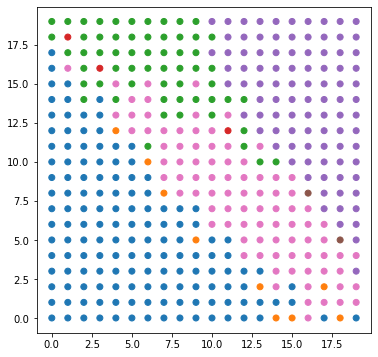

In [44]:
plt.figure(figsize=(6,6))


# create a dictionary to store unique coordinates and their responses
coord_dict = {}
x,y=idx2coords(np.array(df.target_dino.values))
for i in range(len(x)):
    coord = (x[i], y[i])
    if coord not in coord_dict:
        coord_dict[coord] = []
    coord_dict[coord]=df[df.target_dino==coord[1]*20+coord[0]].response.values

# find the most common response for each unique coordinate
coords = []
most_common = []
for coord in coord_dict:
    coords.append(coord)
    most_common.append(Counter(coord_dict[coord]).most_common(1)[0][0])
# print(most_common)
plt.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c=most_common, cmap=cmap,vmin=-0.5, vmax=9.5)
# plt.show()
plt.savefig('2d-4d7-joint.png')


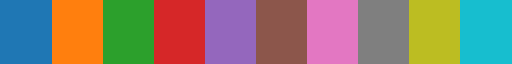

In [7]:
cmap

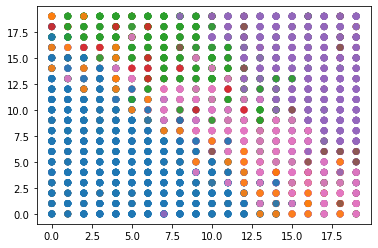

In [45]:
plt.scatter(x,y,c=df.response,cmap=cmap, alpha=.9, vmin=-0.5, vmax=9.5)
# plt.savefig('2djoint.png')

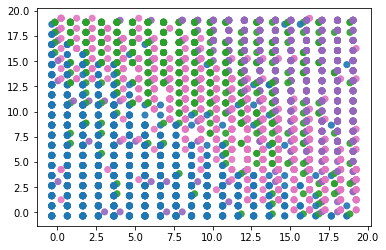

In [5]:
df1=df[~df.response.isin([1,3,5,7])]
x1,y1=idx2coords(np.array(df1.target_dino.values))
plt.scatter(x1+(df1.response-3.5)*.1,y1+(df1.response-3.5)*.1,c=df1.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

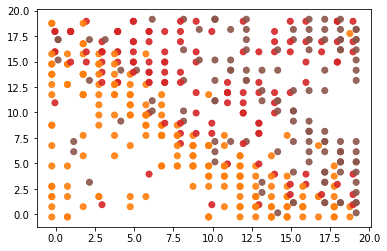

In [6]:
df2=df[df.response.isin([1,3,5,7])]
x2,y2=idx2coords(np.array(df2.target_dino.values))
plt.scatter(x2+(df2.response-3.5)*.1,y2+(df2.response-3.5)*.1,c=df2.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

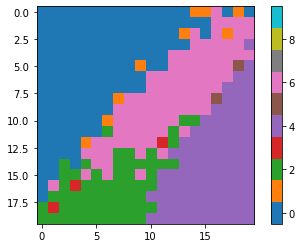

In [46]:
# create 2D array of most common responses
n_rows = int(max(y)) + 1
n_cols = int(max(x)) + 1
response_array = np.zeros((n_rows, n_cols))
for i in range(len(coords)):
    row = int(coords[i][1])
    col = int(coords[i][0])
    response_array[row, col] = most_common[i]#+1

# define color map
cmap = plt.get_cmap('tab10')

# plot response array as a solid matrix
plt.imshow(response_array, cmap=cmap, interpolation='nearest', vmin=-0.5, vmax=9.5)

# add color bar legend
cbar = plt.colorbar()

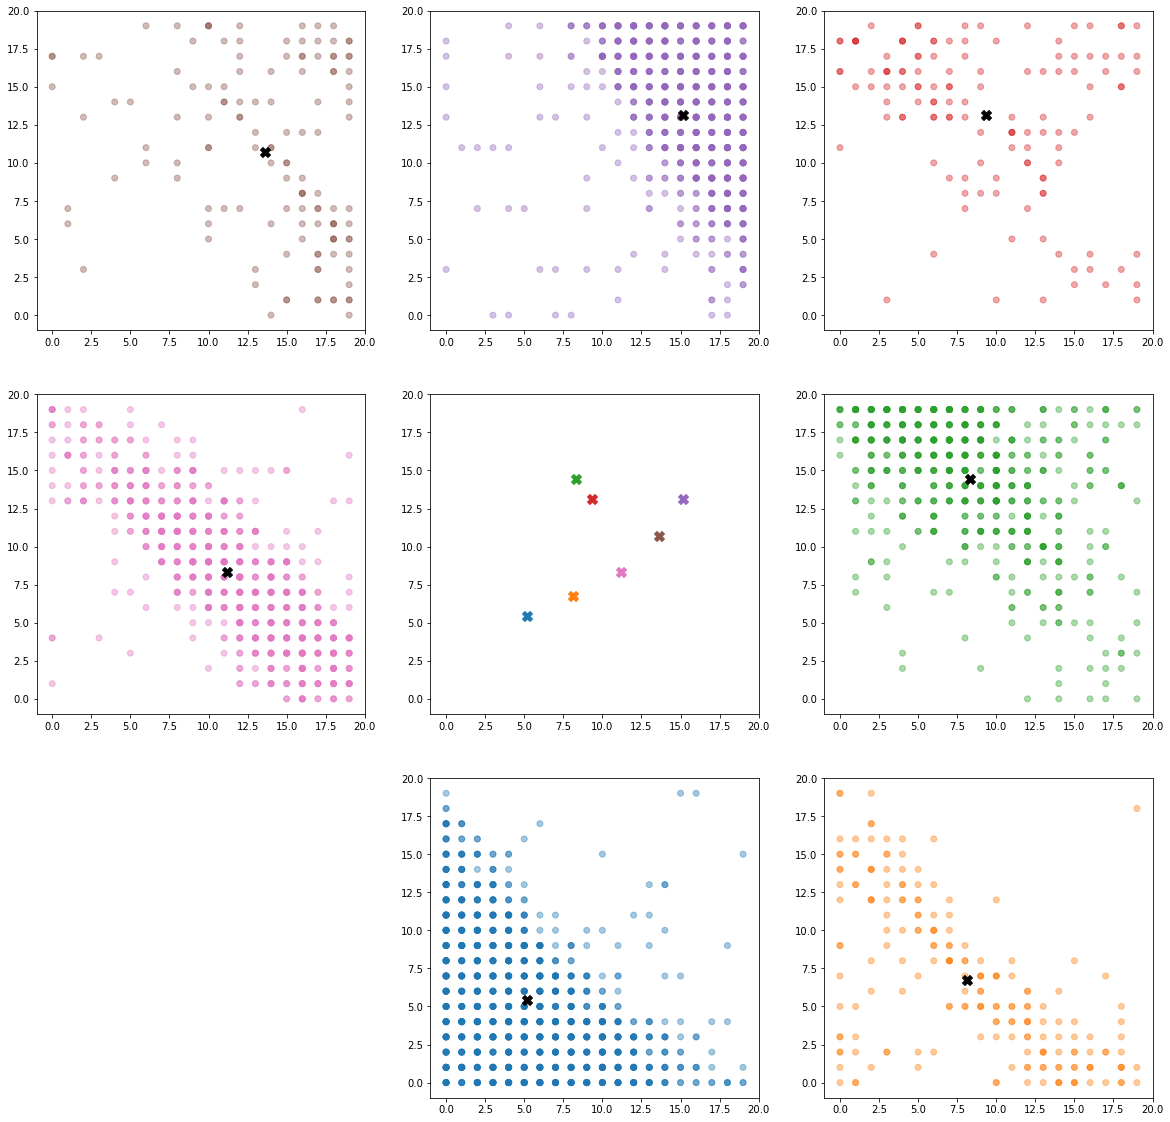

In [8]:
# order=[7,8,9,6,3,2,1,4]
dinos=[[40,30,0,0,0,0,0,30],
       [0,30,40,30,0,0,0,0],
       [0,0,0,30,40,30,0,0],
       [0,0,0,0,0,30,40,30]]
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[8,9,6,3,2,1,4,7]
plt.figure(figsize=(20,20))
for i in sorted(df.response.unique()):
    dft=df[df.response.isin([i])]
    xt,yt=idx2coords(np.array(dft.target_dino.values))
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.4, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    plt.subplot(3,3,5)
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    # plt.show()
    

    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig('2d-4d7.png')

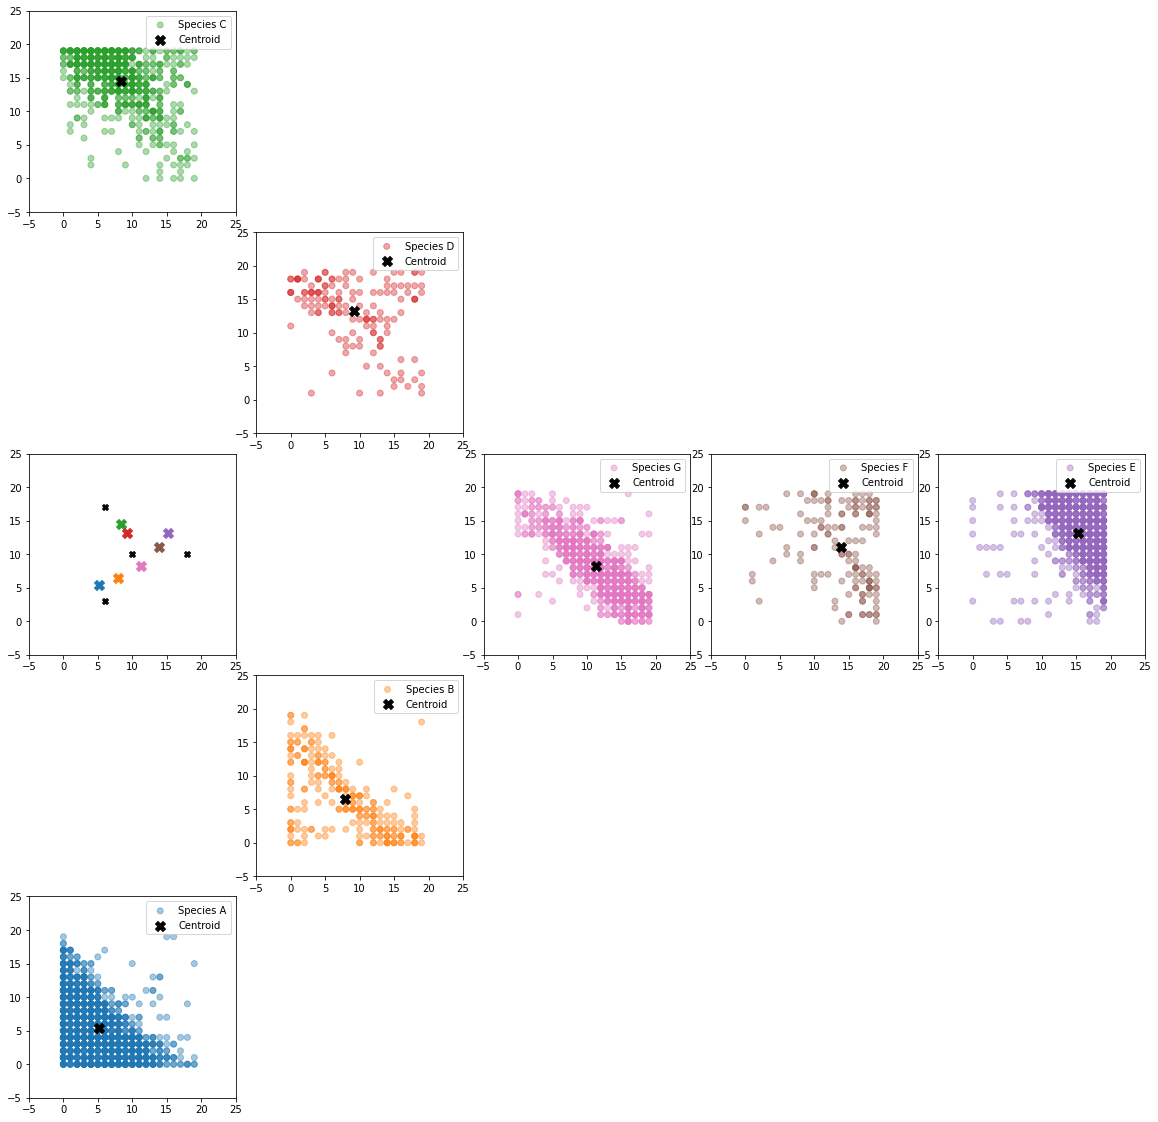

In [47]:
# order=[7,8,9,6,3,2,1,4]
dinos=[[60,40,0,0,0,0,0],
       [0,0,60,40,0,0,0],
       [0,0,0,0,60,40,0],
       [0,22,0,22,0,22,34]]
locs=[[6,3],
      [6,17],
      [18,10],
      [10,10]]
locs=np.array(locs)
locs.transpose((1,0))
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

order=[21,17,1,7,15,14,13]
species='ABCDEFGH'
plt.figure(figsize=(20,20))
ax=plt.subplot(5,5,11)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
# for i in range(4):
#     ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
#     ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
#     ax_pie1.set_xticks([])
#     ax_pie1.set_yticks([])

for i in sorted(df.response.unique()):
    dft=df[df.response.isin([i])]
    xt,yt=idx2coords(np.array(dft.target_dino.values))
    plt.subplot(5,5,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.4, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(5,5,11)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.subplot(5,5,11)
plt.scatter(locs[:,0],locs[:,1],c='black',marker='X')

    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig('2d-4d7-wpies.png')

In [48]:
def get_dists(vectors):
    vectors = np.array(vectors)
    target_vectors = np.array(locs)

    # Reshape the arrays to enable broadcasting
    vectors = vectors[:, np.newaxis, :]
    target_vectors = target_vectors[np.newaxis, :, :]

    # Compute the Euclidean distance using vectorized operations
    distances = np.sqrt(np.sum((vectors - target_vectors) ** 2, axis=-1))

    return distances

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=-1)[:, np.newaxis]

def simulate_soft(points, k=8,model='1nn'):
    if model=='1nn':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        # print(closest_idx)
        probs=np.array(dinos)[closest_idx].reshape((20,20,k))/1
    if model=='2nn':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]+np.array(dinos)[closest_idx2]).reshape((20,20,k))/2
    if model=='2nn_dw':
        dists=get_dists(points)
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='2nn_dw2':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='4nn_dw2':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='4nn_dw2_softmax':
        dists=get_dists(points)**2
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*softmax(probs)).reshape((20,20,k))
        print(probs.shape)
    if model=='2nn_dw4':
        dists=get_dists(points)**4
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='4nn_dw4':
        dists=get_dists(points)**4
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='2nn_expdw':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis])
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='4nn_expdw':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*probs/np.sum(probs,axis=-1)[:, np.newaxis]).reshape((20,20,k))
        print(probs.shape)
    if model=='4nn_expdw_softmax':
        dists=np.exp(get_dists(points))
        closest_idx=np.argsort(dists,axis=-1)[:,0]
        closest_idx2=np.argsort(dists,axis=-1)[:,1]
        closest_idx3=np.argsort(dists,axis=-1)[:,2]
        closest_idx4=np.argsort(dists,axis=-1)[:,3]
        # print(closest_idx)
        probs=(np.array(dinos)[closest_idx]/np.sort(dists)[:,0][:, np.newaxis]
               +np.array(dinos)[closest_idx2]/np.sort(dists)[:,1][:, np.newaxis]
               +np.array(dinos)[closest_idx3]/np.sort(dists)[:,2][:, np.newaxis]
               +np.array(dinos)[closest_idx4]/np.sort(dists)[:,3][:, np.newaxis]
              )
        probs=(100*softmax(probs)).reshape((20,20,k))
        print(probs.shape)
    arrays = np.array([probs[:, :, i] for i in range(k)])
    # Create coordinate arrays
    x_coords, y_coords = np.meshgrid(np.arange(20), np.arange(20), indexing='ij')

    # Add two new axes to the coordinate arrays to match the shape of the data array
    x_coords = x_coords[np.newaxis, :, :]
    y_coords = y_coords[np.newaxis, :, :]
    # Repeat the coordinate arrays along the first axis to match the data array
    x_coords = np.repeat(x_coords, k, axis=0)
    y_coords = np.repeat(y_coords, k, axis=0)
    # Combine the coordinate arrays and the data array
    combined = np.stack((x_coords, y_coords, arrays), axis=-1)

    # Reshape the combined array into an 8x400x3 matrix
    matrix = combined.reshape(k, -1, 3).astype(int)
    simulations=[]
    for i in range(k):
        result=np.array([np.tile(np.array([x, y, i]), (L, 1)) for x, y, L in matrix[i] if L>0])
        flattened_result = [np.array(item) for sublist in result for item in sublist.tolist()]
        simulations.append(np.array(flattened_result).astype(int))
    simulations=np.concatenate(simulations)
    df=pd.DataFrame(simulations, columns=['x','y','response'])
    return df



(20, 20, 7)


/tmp/ipykernel_159519/796666635.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result=np.array([np.tile(np.array([x, y, i]), (L, 1)) for x, y, L in matrix[i] if L>0])


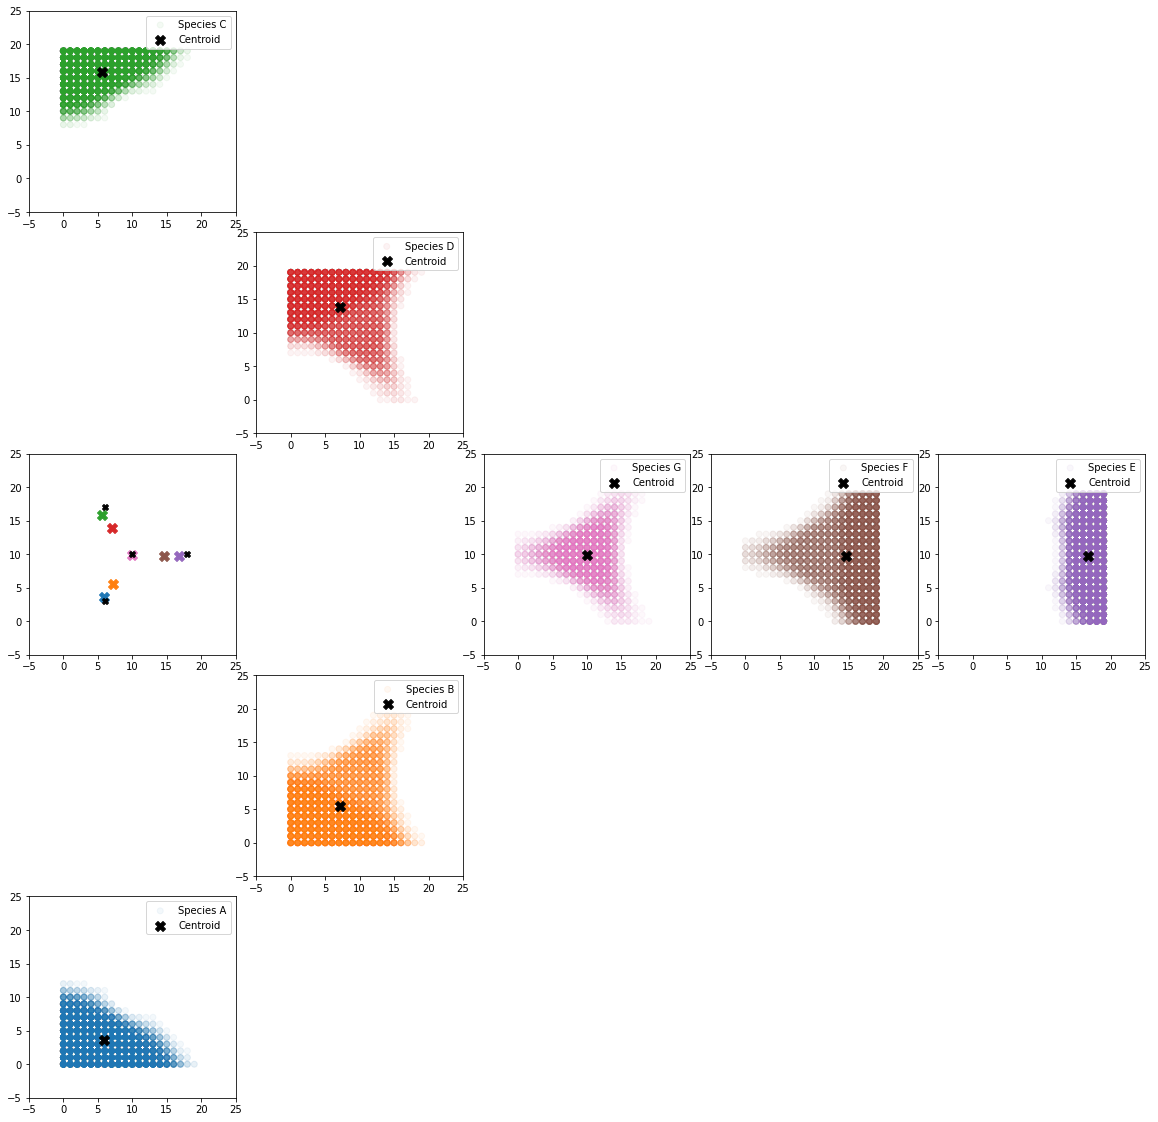

In [49]:
# order=[7,8,9,6,3,2,1,4]
grid_points = [(x, y) for x in range(20) for y in range(20)]
model="4nn_expdw"
sim_df=simulate_soft(grid_points,7,model)
# dinos=[[40,30,0,0,0,0,0,30],
#        [0,30,40,30,0,0,0,0],
#        [0,0,0,30,40,30,0,0],
#        [0,0,0,0,0,30,40,30]]
# locs=[[10,0],
#       [19,10],
#       [10,19],
#       [0,10]]
dinos=[[60,40,0,0,0,0,0],
       [0,0,60,40,0,0,0],
       [0,0,0,0,60,40,0],
       [0,22,0,22,0,22,34]]
locs=[[6,3],
      [6,17],
      [18,10],
      [10,10]]
locs=np.array(locs)
centers=[[.3,-0.05],
         [.65,.3],
         [0.3,.65],
         [-0.05,.3]]
def plot_pie(i, ax, r=1): 
    # radius for pieplot size on a scatterplot
    pie_wedges=ax.pie(dinos[i], radius=r, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
    for wedge in pie_wedges[0]:
        wedge.set_transform(ax.transData)
        wedge.set_center(centers[i])

# order=[3,8,21,17,25,19,13]
# order=[21,17,25,19,3,8,13]
order=[21,17,1,7,15,14,13]
species='ABCDEFGH'
plt.figure(figsize=(20,20))
ax=plt.subplot(5,5,11)
ax.set_ylim((-5,25))
ax.set_xlim((-5,25))
# Create a new axis for the first pie chart
# for i in range(4):
#     ax_pie1 = ax.inset_axes([centers[i][0],centers[i][1], 0.4, 0.4], transform=ax.transAxes,  frameon=False)
#     ax_pie1.pie(dinos[i], radius=.3, colors=cmap(np.array([0,1,2,3,4,5,6,7])))
#     ax_pie1.set_xticks([])
#     ax_pie1.set_yticks([])

for i in sorted(sim_df.response.unique()):
    dft=sim_df[sim_df.response.isin([i])]
    xt,yt=dft.x,dft.y
    plt.subplot(5,5,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.05, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Centroid')
    plt.ylim((-5,25))
    plt.xlim((-5,25))
    plt.legend()
    plt.subplot(5,5,11)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {species[i]}')
    # plt.show()
    # plt.colorbar()
    
plt.subplot(5,5,11)
plt.scatter(locs[:,0],locs[:,1],c='black',marker='X')

plt.subplots_adjust(wspace=0.1, hspace=0.1)


    
# plot_pie(1, ax, r=.1)
# ax.set_frame_on(True)
# ax_pie1.set_frame_on(False)
# ax.set_ylim((-1,20))
# ax.set_xlim((-1,20))
# plt.colorbar()
plt.savefig(f'2d_{model}_4d7_wpies.png')

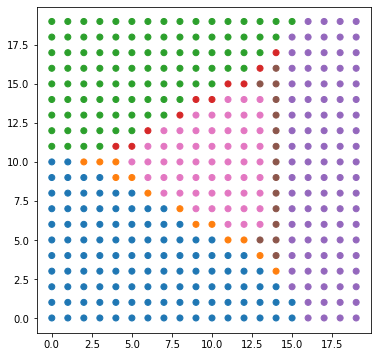

In [50]:

plt.figure(figsize=(6,6))
# create a dictionary to store unique coordinates and their responses
coord_dict = {}
# x,y=idx2coords(np.array(df.target_dino.values))
x,y=sim_df.x,sim_df.y
for i in range(len(x)):
    coord = (x[i], y[i])
    if coord not in coord_dict:
        coord_dict[coord] = []
    coord_dict[coord]=sim_df[(sim_df.y==coord[1])&(sim_df.x==coord[0])].response.values

# find the most common response for each unique coordinate
coords = []
most_common = []
for coord in coord_dict:
    coords.append(coord)
    most_common.append(Counter(coord_dict[coord]).most_common(1)[0][0])
# print(most_common)
plt.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c=most_common, cmap=cmap,vmin=-0.5, vmax=9.5)
# plt.show()
plt.savefig(f'2d_{model}_4d7_joint.png')


In [36]:
locs=[[10,18],
      [10,10],
      [3,6],
      [17,6]]
get_dists(locs), np.mean([locs[0],locs[2],locs[3]],axis=0)

(array([[ 0.        ,  8.        , 13.89244399, 13.89244399],
        [ 8.        ,  0.        ,  8.06225775,  8.06225775],
        [13.89244399,  8.06225775,  0.        , 14.        ],
        [13.89244399,  8.06225775, 14.        ,  0.        ]]),
 array([10., 10.]))

In [35]:
idx2coords(66), idx2coords(218), idx2coords(346)


((6, 3), (18, 10), (6, 17))

In [25]:
print(df.stimulus.values[0])

<br>Scientists did a DNA analysis of four dinosaur fossils and found that 
        they were descendants of unseen dinosaur species, labeled A, B, C, D, E, F, and G.<br>
        In the following trials, <b>carefully examine the four dinosaurs and the available 
        genetic information before making a decision.</b><br><br><div class='flexbox-container'>
      <div class='flexbox-item'>
        <p>Dinosaur 1<br>
          <img src='static/images/2d-dinos/d210.svg' style="margin-top: -100px; overflow: hidden;"></img>
          
          <table class='soft-label-table'>
            <tr>
              <th>Dinosaur<br>Species</th>
              <th>Percent<br>Related</th>
            </tr>
            
              <tr>
                <td>A</td>
                <td>0%</td>
              </tr>
            
              <tr>
                <td>B</td>
                <td>22%</td>
              </tr>
            
              <tr>
                <td>C</td>
                <td>0%</td>
